In [417]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

In [ ]:
#Read the data  读入撞zhaoyh/HXY/击感度数值
T_0 = pd.read_excel('/export/home/zhaoyh/HXY/AGS/AGSy.xlsx')  # 使用完整路径
T=np.array(T_0)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#T=T.ravel()
print(T)  
print(len(T))

[[ 4.01337680e+00]
 [ 3.54836716e+00]
 [ 3.54836716e+00]
 [ 3.44105724e+00]
 [ 3.28009237e+00]
 [ 3.28009237e+00]
 [ 3.21749492e+00]
 [ 3.17278245e+00]
 [ 3.17278245e+00]
 [ 3.12806999e+00]
 [ 3.04758755e+00]
 [ 3.04758755e+00]
 [ 3.01181758e+00]
 [ 3.01181758e+00]
 [ 2.98499010e+00]
 [ 2.94922013e+00]
 [ 2.94922013e+00]
 [ 2.71671531e+00]
 [ 2.67200284e+00]
 [ 2.65411786e+00]
 [ 2.65411786e+00]
 [ 2.62729038e+00]
 [ 2.61834788e+00]
 [ 2.36795808e+00]
 [ 2.35901558e+00]
 [ 2.32324561e+00]
 [ 2.27853315e+00]
 [ 2.26064816e+00]
 [ 2.24276317e+00]
 [ 2.24276317e+00]
 [ 2.24276317e+00]
 [ 2.23382068e+00]
 [ 2.18910822e+00]
 [ 2.16228074e+00]
 [ 2.11756827e+00]
 [ 2.10862578e+00]
 [ 2.09968329e+00]
 [ 2.08179830e+00]
 [ 2.07285581e+00]
 [ 2.05497082e+00]
 [ 2.01920085e+00]
 [ 2.00131586e+00]
 [ 1.92977592e+00]
 [ 1.92083343e+00]
 [ 1.91189093e+00]
 [ 1.89400595e+00]
 [ 1.87612096e+00]
 [ 1.86717847e+00]
 [ 1.85823597e+00]
 [ 1.82246600e+00]
 [ 1.80458102e+00]
 [ 1.80458102e+00]
 [ 1.6883286

In [ ]:
#读入特征    1000种描述符数据 
#X=pd.read_excel('IRRAK4x1.xlsx')
X=pd.read_excel('/export/home/zhaoyh/HXY/AGS/finger/AGSx.xlsx')
X=np.array(X)
from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[1 0 0 ... 0 1 1]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
1024
635


In [45]:
# 12 

In [46]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=20)

In [47]:
test_y = T_test
test_x = X_test

In [48]:
cv_x = X_train
cv_y = T_train

In [49]:
from sklearn.metrics import r2_score
import lightgbm as lgb

cv_scores = []
test_scores = []
pred_valid = []
pred_test = []
MAE_scores = []
RMSE_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=725)
for train_ix, valid_ix in kf.split(cv_x):
    train_x = cv_x[train_ix]
    valid_x = cv_x[valid_ix]
    train_y = cv_y[train_ix]
    valid_y = cv_y[valid_ix]
    regressor = lgb.LGBMRegressor(n_estimators=1000, n_jobs=1)
    regressor.fit(train_x,train_y)
    lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                       importance_type='split', learning_rate=0.1, max_depth=-1,feature_fraction=0.6,bagging_fraction=0.6,
                       min_child_samples=10, min_child_weight=0.1, min_split_gain=0.0,
                       n_estimators=240, n_jobs=-1, objective='regression', num_leaves=30,
                       random_state=None, reg_alpha=0.6, reg_lambda=0.0, silent=True,
                       subsample=0.6, subsample_for_bin=200000, subsample_freq=0)
    val_results = regressor.predict(valid_x)
    pred_valid.append(val_results)
    valid_score = r2_score(valid_y,val_results)
    cv_scores.append(valid_score)
    
    test_results = regressor.predict(test_x)
    pred_test.append(test_results)
    test_score = r2_score(test_y,test_results)
    test_scores.append(test_score)
    y_true=test_y

    MAE_score = mean_absolute_error(test_y, test_results)
    MAE_scores.append(MAE_score)
    
    RMSE_score = np.sqrt(mean_squared_error(test_y, test_results))
    RMSE_scores.append(RMSE_score)

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 1016
[LightGBM] [Info] Start training from score -0.037677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1015
[LightGBM] [Info] Start training from score -0.022628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.041939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1016
[LightGBM] [Info] Start training from score -0.010449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1015
[LightGBM] [Info] Start training from score -0.008101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.030022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [50]:
print('test: {:.3f}+-{:.3f}'.format(np.array(test_scores).mean(), np.array(test_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(MAE_scores).mean(), np.array(MAE_scores).std()))
print('test: {:.3f}+-{:.3f}'.format(np.array(RMSE_scores).mean(), np.array(RMSE_scores).std()))

test: 0.722+-0.038
test: 0.452+-0.024
test: 0.637+-0.042


In [51]:
import lightgbm as lgb  
from sklearn.model_selection import KFold  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  
import numpy as np  
  
# 假设 cv_x, cv_y, test_x, test_y 已经被定义并加载了数据  
  
cv_scores = []  
train_r2_scores = []  
train_mae_scores = []  
train_rmse_scores = []  
test_scores = []  
MAE_scores = []  
RMSE_scores = []  
  
kf = KFold(n_splits=10, shuffle=True, random_state=725)  
for train_ix, valid_ix in kf.split(cv_x):  
    train_x = cv_x[train_ix]  
    valid_x = cv_x[valid_ix]  
    train_y = cv_y[train_ix]  
    valid_y = cv_y[valid_ix]  
      
    regressor = lgb.LGBMRegressor(n_estimators=1000, n_jobs=1   
                                  # 你可以在这里添加其他参数  
                                  )  
    regressor.fit(train_x, train_y)  
      
    # 训练集预测  
    train_predictions = regressor.predict(train_x)  
      
    # 计算训练集的R2, MAE, RMSE  
    train_r2 = r2_score(train_y, train_predictions)  
    train_mae = mean_absolute_error(train_y, train_predictions)  
    train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions))  
      
    # 存储训练集的指标  
    train_r2_scores.append(train_r2)  
    train_mae_scores.append(train_mae)  
    train_rmse_scores.append(train_rmse)  
      
    # 验证集预测  
    val_results = regressor.predict(valid_x)  
      
    # 计算验证集的R2  
    valid_score = r2_score(valid_y, val_results)  
    cv_scores.append(valid_score)  
      
    # 假设 test_x 和 test_y 已经被定义，进行测试集预测  
    test_results = regressor.predict(test_x)  
    test_score = r2_score(test_y, test_results)  
    test_scores.append(test_score)  
      
    # 计算测试集的MAE和RMSE  
    mae_score = mean_absolute_error(test_y, test_results)  
    MAE_scores.append(mae_score)  
      
    rmse_score = np.sqrt(mean_squared_error(test_y, test_results))  
    RMSE_scores.append(rmse_score)  
  
# 输出训练集的结果  
print('Training R2 scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(train_r2_scores), np.std(train_r2_scores)))  
print('Training MAE scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(train_mae_scores), np.std(train_mae_scores)))  
print('Training RMSE scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(train_rmse_scores), np.std(train_rmse_scores)))  
  
# 输出验证集的结果  
print('Cross-validation R2 scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(cv_scores), np.std(cv_scores)))  
  
# 输出测试集的结果  
print('Test R2 scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(test_scores), np.std(test_scores)))  
print('Test MAE scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(MAE_scores), np.std(MAE_scores)))  
print('Test RMSE scores: mean = {:.3f}, std = {:.3f}'.format(np.mean(RMSE_scores), np.std(RMSE_scores)))

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 1016
[LightGBM] [Info] Start training from score -0.037677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1015
[LightGBM] [Info] Start training from score -0.022628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.011476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.040878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.041939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1016
[LightGBM] [Info] Start training from score -0.002968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2032
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1016
[LightGBM] [Info] Start training from score -0.010449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1015
[LightGBM] [Info] Start training from score -0.008101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.030022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 1017
[LightGBM] [Info] Start training from score -0.043853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [421]:
# -20

In [422]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=20)

In [423]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
plt.style.use('ggplot')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regressor = lgb.LGBMRegressor(n_estimators=1000, n_jobs=1)
regressor.fit(X_train,T_train)
lgb.LGBMRegressor(boosting_type='gbdt', class_weight=0.5, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=4,
       min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=900, n_jobs=-1, num_leaves=31,random_state=42, reg_alpha=0.01, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/export/home/zhaoyh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 1017
[LightGBM] [Info] Start training from score -0.024997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(class_weight=0.5, max_depth=4, min_child_samples=1,
              n_estimators=900, n_jobs=-1, random_state=42, reg_alpha=0.01,
              silent=True)

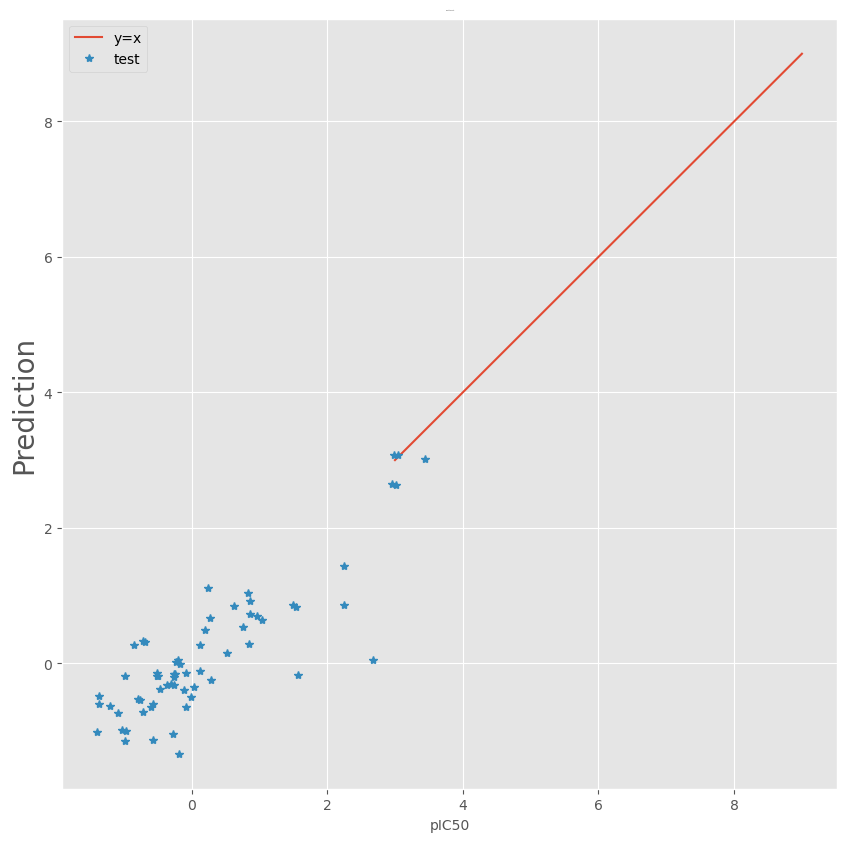

In [424]:
import matplotlib.pyplot as plt

y_true_test=T_test
y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(3,10), range(3,10),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("pIC50", fontsize=10)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=10)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [425]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.726589041287437


In [426]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
#y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.439316364968722

In [427]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.6326485379110348

<Figure size 1000x1000 with 0 Axes>

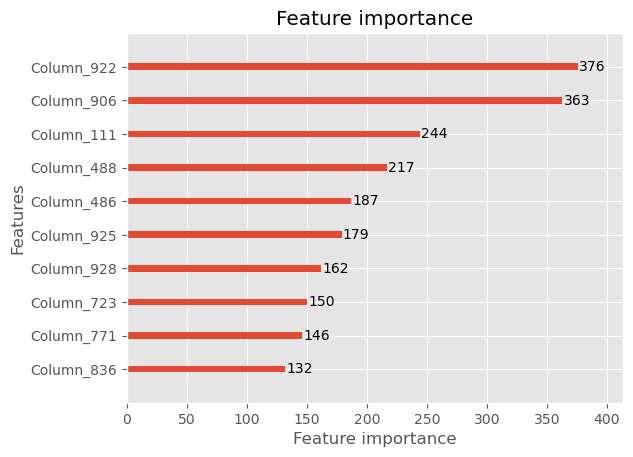

In [85]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(regressor,max_num_features=10)
plt.show()

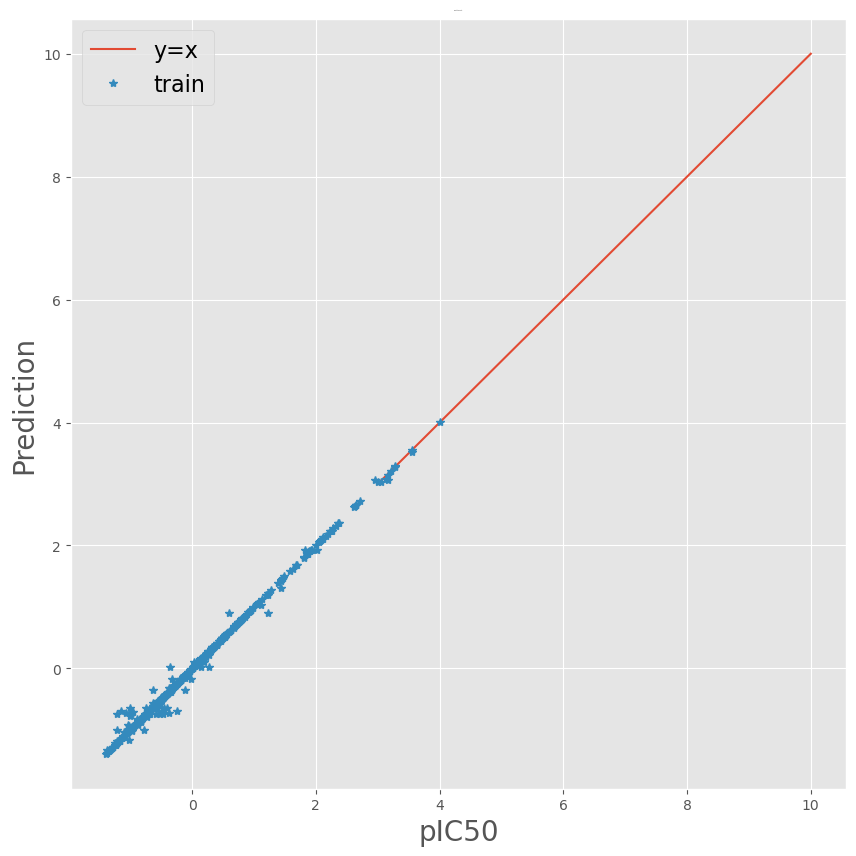

In [86]:
#查看散点图
import matplotlib.pyplot as plt
y_true_train=T_train
y_pred_train=regressor.predict(X_train)

legend=["y=x","train"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(3,11), range(3,11),"-")
plt.plot(y_true_train, y_pred_train,"*")
plt.xlabel("pIC50", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [87]:
from sklearn.metrics import r2_score
print ("训练集 r^2 score",r2_score(T_train,y_pred_train))

训练集 r^2 score 0.9955558500638355


In [88]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_train
y_pred=regressor.predict(X_train)
mean_absolute_error(y_true, y_pred)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.020642621163011157

In [89]:
np.sqrt(mean_squared_error(y_true,y_pred))

0.06469563411744715

In [25]:
y_pred_train=regressor.predict(X_train)
df=pd.DataFrame(y_pred_train)
df.to_csv("./PLQY/resulttrainEMPreLGB77E.csv",index=False,header=False)
y_true=T_train
df=pd.DataFrame(y_true)
df.to_csv("./PLQY/resulttrainEMTrueLGB77E.csv",index=False,header=False)

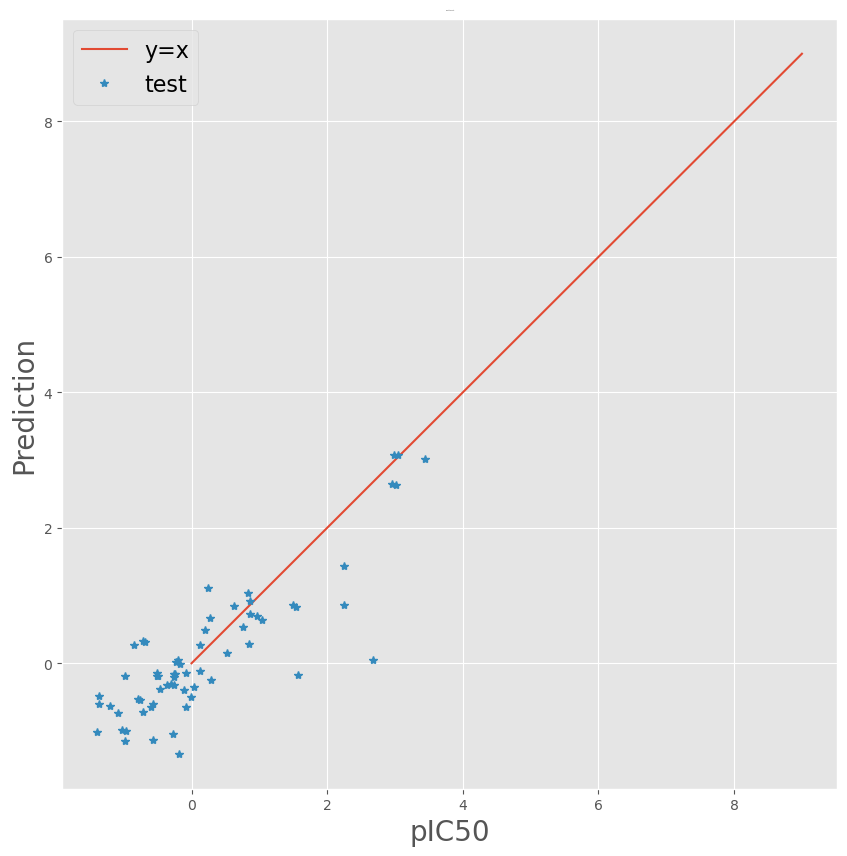

In [65]:
import matplotlib.pyplot as plt

y_true_test=T_test
#y_pred_test=regressor.predict(X_test)
legend=["y=x","test"]
fig = plt.figure(figsize=(10,10))
plt.plot(range(0,10), range(0,10),"-")
plt.plot(y_true_test, y_pred_test,"*")
plt.xlabel("pIC50", fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.legend(legend,fontsize=16)
plt.title('Scatter Plot', fontsize=1)
plt.show()

In [66]:
from sklearn.metrics import r2_score
print ("测试集 r^2 score",r2_score(T_test,y_pred_test))

测试集 r^2 score 0.726589041287437


In [67]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true=T_test
#y_pred=regressor.predict(X_test)
mean_absolute_error(y_true, y_pred_test)
#np.sqrt(mean_squared_error(y_true,y_pred))

0.439316364968722

In [68]:
np.sqrt(mean_squared_error(y_true,y_pred_test))

0.6326485379110348

In [69]:
y_pred_test=regressor.predict(X_test)
df=pd.DataFrame(y_pred_test)
df.to_csv("./export/home/zhaoyh/HXY/AGS/predicted.csv",index=False,header=False)
y_true=T_test
df=pd.DataFrame(y_true)
df.to_csv("./export/home/zhaoyh/HXY/AGS/pIC50.csv",index=False,header=False)